# Project Day

`COSC210`
`Soobin Rho`
***

<center><b><em>Making a Class</em></b></center>

4 Attributes in the parent class, 1 additional (5 total) attributes in the child class
    - Attributes must contain 4 of the 8 data types covered in class (int, float, str, list, tuple, dict, set, or array)
    - Make use of a Default value for one of the parameters in your class(es)
- 2 custom Methods in the parent class, 1 new method in the child class, 1 of the 2 methods in the parent class must be modified in the child class
    - Methods will have some action that uses the attributes
    - One method must be a recursive function
- init, repr, and str methods in both classes, modified using the super() function in the child class
- Must use Getter methods for ALL attributes and have attributes hidden behind the single underscore
- Use setter methods for two attributes
You will be graded on meeting the above minimum requirements for the classes, the use of comments and docstrings in your code, as well as proper functioning of the code. Once you have created your classes, you must demonstrate the use of them in a Jupyter Notebook. Create some instances of them and use the methods, check attributes, and show that errors will pop up if they are not used correctly. 

In [1]:
'''A Class for Graphing Right-Angle Triangles.'''
import numpy as np
import seaborn as sns
import matplotlib_inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Setting the graph's file format as 'svg' for 
# Jupyter Lab inline display and 'pdf' for exporting.
matplotlib_inline.backend_inline.set_matplotlib_formats('svg', 'pdf')

# Making the graph look nice with seaborn.
sns.set_theme()

# +++++++++++++++++++++++++++++++++++++++++++++++++++
# A note to my future self. When writing a class, 
# you might find these videos helpful.
#
# "Python's Class Development Toolkit"
#     :  by Raymond Hettinger
#     :  https://www.youtube.com/watch?v=HTLu2DFOdTg
#
# "Best practices for beautiful intelligible code"
#     :  by Raymond Hettinger
#     :  https://www.youtube.com/watch?v=wf-BqAjZb8M
# +++++++++++++++++++++++++++++++++++++++++++++++++++

class Graph_Right_Angle_Trinalge(object):
    '''
        
    '''
    
    # ------------------------------------------ #
    # Class-level Variables
    # ------------------------------------------ #
    version = '1.0'

    # ------------------------------------------ #
    # Initializer
    # ------------------------------------------ #    
    def __init__(
            # The instance being initialized.
            self,
        
            # The two most important parameters. 
            # Note that the length of the hypotenuse is not
            # here because it'll be automaticlaly calculated.
            len_adjacent: float = 12,
            len_opposite: float = 12,
        
            # Optional parameters for aesthetics.
            color_triangle: str = 'k',
            width_triangle: float = 2,
            width_grid_line: float = 0.5,
            figure_size: list = [3, 3],
            figure_xlim: list = [0, 20],
            figure_ylim: list = [0, 20],
            coordinates_starting: list = [1, 1],
            annotation_adjacent: dict = {
                'text': r' ',
                'xy': (0, 0),
                'xytext': (7.5, 1.6),
                'fontsize': 12
            },
            annotation_opposite: dict = {
                'text': r' ',
                'xy': (0, 0),
                'xytext': (16.6, 9),
                'fontsize': 12
            },
            annotation_hypotenuse: dict = {
                'text': r' ',
                'xy': (0, 0),
                'xytext': (9, 10.7),
                'fontsize': 12
            },
            annotation_theta: dict = {
                'text': r' ',
                'xy': (0, 0),
                'xytext': (5.6, 4.4),
                'fontsize': 12
            }                 
        ):
        
        self._len_adjacent = len_adjacent
        self._len_opposite = len_opposite
        self._color_triangle = color_triangle
        self._width_triangle = width_triangle
        self._width_grid_line = width_grid_line
        self._figure_size = figure_size
        self._figure_xlim = figure_xlim
        self._figure_ylim = figure_ylim
        self._coordinates_starting = coordinates_starting
        self._annotation_adjacent = annotation_adjacent
        self._annotation_opposite = annotation_opposite  
        self._annotation_hypotenuse = annotation_hypotenuse
        self._annotation_theta = annotation_theta        
        
    # ------------------------------------------ #
    # Getters and Setters
    # ------------------------------------------ #            
    @property
    def len_adjacent(self):
        return self._len_adjacent

    @len_adjacent.setter
    def len_adjacent(self, len_adjacent):
        # If the input value is zero or negative,
        # raise ValueError.
        raise ValueError
        if len_adjacent <= 0:
            raise ValueError(f'Invalid {__name__}')        
        self._len_adjacent = len_adjacent
        
    @property
    def len_opposite(self):
        return self._len_opposite

    @len_opposite.setter
    def len_opposite(self, len_opposite):
        self._len_opposite = len_opposite      
        
    @property
    def color_triangle(self):
        return self._color_triangle
    
    @color_triangle.setter
    def color_triangle(self, color_triangle):
        self._color_triangle = color_triangle
    
    @property
    def width_triangle(self):
        return self._width_triangle
    
    @width_triangle.setter
    def width_triangle(self, width_triangle):
        self._width_triangle = width_triangle
    
    @property
    def width_grid_line(self):
        return self._width_grid_line
    
    @width_grid_line.setter
    def width_grid_line(self, width_grid_line):
        self._width_grid_line = width_grid_line
    
    @property
    def figure_size(self):
        return self._figure_size
    
    @figure_size.setter
    def figure_size(self, figure_size):
        self._figure_size = figure_size
    
    @property
    def figure_xlim(self):
        return self._figure_xlim
    
    @figure_xlim.setter
    def figure_xlim(self, figure_xlim):
        self._figure_xlim = figure_xlim
    
    @property
    def figure_ylim(self):
        return self._figure_ylim
    
    @figure_ylim.setter
    def figure_ylim(self, figure_ylim):
        self._figure_ylim = figure_ylim
    
    @property
    def coordinates_starting(self):
        return self._coordinates_starting
    
    @coordinates_starting.setter
    def coordinates_starting(self, coordinates_starting):
        self._coordinates_starting = coordinates_starting
    
    @property
    def annotation_adjacent(self):
        return self._annotation_adjacent
    
    @annotation_adjacent.setter
    def annotation_adjacent(self, annotation_adjacent):
        self._annotation_adjacent = annotation_adjacent
    
    @property
    def annotation_opposite(self):
        return self._annotation_opposite
    
    @annotation_opposite.setter
    def annotation_opposite(self, annotation_opposite):
        self._annotation_opposite = annotation_opposite
    
    @property
    def annotation_hypotenuse(self):
        return self._annotation_hypotenuse
    
    @annotation_hypotenuse.setter
    def annotation_hypotenuse(self, annotation_hypotenuse):
        self._annotation_hypotenuse = annotation_hypotenuse
    
    @property
    def annotation_theta(self):
        return self._annotation_theta
    
    @annotation_theta.setter
    def annotation_theta(self, annotation_theta):
        self._annotation_theta = annotation_theta
        
    # ------------------------------------------ #
    # __repr__ and __str__
    # ------------------------------------------ #            
    def __repr__(self):
        '''Returns the string for repr(...)'''
        

        repr_string = self.__class__.__name__
        return repr_string
    
    def __str__(self):
        '''Returns the string for print(...)'''

        repr_string = self.__class__.__name__
        return repr_string
    
    # ------------------------------------------ #
    # Methods
    # ------------------------------------------ #        

# # Initializing the graph.
# fig = plt.figure(figsize=(3, 3))    
# ax = plt.gca()
# ax.tick_params(labelbottom=False, labelleft=False)
# ax.yaxis.set_major_locator(MultipleLocator(2))
# ax.xaxis.set_major_locator(MultipleLocator(2))
# ax.grid(linewidth=0.5)

#         # Plotting the triangle.
#         y = 4
#         x = 4
#         left = (x, y)
#         right = (x + 12, y)
#         top = (x + 12, y + 12)
#         points = np.array([left, right, top])
#         pivot = plt.Polygon(
#             points, 
#             closed=True, 
#             edgecolor='k', 
#             fill=False,
#             linewidth=2
#         )
#         ax.add_patch(pivot)
#         ax.set_xlim(0, 20)
#         ax.set_ylim(0, 20)
#         ax.set_aspect('equal')

#         # Plotting the annotations.
#         string = r'$x$'    # Opposite
#         plt.annotate(string, xy=(0, 0), xytext=(16.6, 9), fontsize=12)
#         string = r'$\sqrt{4-x^2}$'    # Adjacent
#         plt.annotate(string, xy=(0, 0), xytext=(7.5, 1.6), fontsize=12)
#         string = r'$2$'    # Hypotenuse
#         plt.annotate(string, xy=(0, 0), xytext=(9, 10.7), fontsize=12)
#         string = r'$\theta$'    # Theta
#         plt.annotate(string, xy=(0, 0), xytext=(5.6, 4.4), fontsize=12)

#         # Displaying the graph.
#         plt.show()    


In [6]:
triangle_1 = Graph_Right_Angle_Trinalge(len_adjacent=2)
# vars(triangle_1)

<class 'dict'>


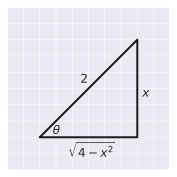

In [19]:
'''
    Script for showing a right-angle triangle for demonstrating
    trigonometric substitution.
'''
import numpy as np
import seaborn as sns
import matplotlib_inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Setting the file format as 'svg' for Jupyter Lab inline display 
# and 'pdf' for exporting.
matplotlib_inline.backend_inline.set_matplotlib_formats('svg', 'pdf')

# Making it look nice.
sns.set_theme()

# Initializing the graph.
fig = plt.figure(figsize=(3, 3))    # Setting the size.
ax = plt.gca()
ax.tick_params(labelbottom=False, labelleft=False)    # Removing the tick labels.
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.grid(linewidth=0.5)

# Plotting the triangle.
y = 4
x = 4
left = (x, y)
right = (x + 12, y)
top = (x + 12, y + 12)
points = np.array([left, right, top])
pivot = plt.Polygon(
    points, 
    closed=True, 
    edgecolor='k', 
    fill=False,
    linewidth=2
)
ax.add_patch(pivot)
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
ax.set_aspect('equal')

# Plotting the annotations.
string = r'$x$'    # Opposite

test = {
 'xy': (0, 0)
}
plt.annotate(string, **test, xytext=(16.6, 9), fontsize=12)
string = r'$\sqrt{4-x^2}$'    # Adjacent
plt.annotate(string, xy=(0, 0), xytext=(7.5, 1.6), fontsize=12)
string = r'$2$'    # Hypotenuse
plt.annotate(string, xy=(0, 0), xytext=(9, 10.7), fontsize=12)
string = r'$\theta$'    # Theta
plt.annotate(string, xy=(0, 0), xytext=(5.6, 4.4), fontsize=12)

# Displaying the graph.
plt.show()

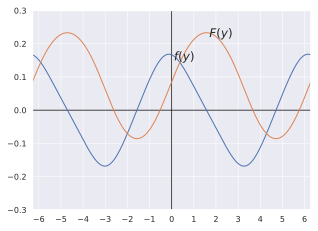

In [14]:
'''
    Python code for verifying our integral.
    We can export this file to a pdf file without the code inside:

    Option 1: Default template
    jupyter nbconvert --no-input AFP2_SoobinRho.ipynb --to pdfviahtml --output-dir='~/Downloads'

    Option 2: Difference is that I set the font to DejaVu Serif
    How I made the template was
    cd ~/anaconda3/share/jupyter/nbconvert/templates/
    mkdir nicepdfviahtml
    cp lab/* ./nicepdfviahtml -r
    cd nicepdfviahtml/static
    vim theme-light.css    # and then change every 'font-family' value to "DejaVu Serif"
    jupyter nbconvert --no-input AFP2_SoobinRho.ipynb --to html --output-dir='~/Downloads' --template nicepdfviahtml
'''
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import numpy as np
import math

matplotlib_inline.backend_inline.set_matplotlib_formats('svg', 'pdf')
sns.set_theme()

# Initializing the graph.
fig = plt.figure(figsize=(5, 5), dpi=300)
plt.axhline(0, color='black', linewidth=0.7)
plt.axvline(0, color='black', linewidth=0.7)
plt.ylim(-0.3, 0.3)
plt.xlim(-2 * math.pi, 2 * math.pi)
ax = plt.gca()
ax.set_aspect(15)
ax.grid(linewidth=0.5)
ax.tick_params(axis='both', which='major', pad=0)
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Define the function of the integrand.
x_integrand = np.linspace(-2 * math.pi, 2 * math.pi, 1000)
y_integrand = np.cos(x_integrand)
y_integrand = y_integrand / (
    np.power(np.sin(x_integrand), 2) + np.sin(x_integrand) + 6
)
plt.plot(x_integrand, y_integrand, linewidth=1)
str_equation = r'$f(y)$'
plt.annotate(str_equation, xy=(0, 0), xytext=(0.1, 0.15), fontsize=12)

# Define the function of the integral.
x_integral = np.linspace(-2 * math.pi, 2 * math.pi, 1000)
y_integral = 2 / math.sqrt(23)
y_integral = y_integral * np.arctan(
    y_integral * (np.sin(x_integral) + (1/2))
)
plt.plot(x_integral, y_integral, linewidth=1)
str_equation = r'$F(y)$'
plt.annotate(str_equation, xy=(0, 0), xytext=(1.7, 0.22), fontsize=12)

# # Hightlight the area
# plt.fill_between(x_integrand, 
#                  y_integrand, 
#                  where= (x_integrand >= 0)&(x_integrand <= 1),
#                  facecolor="grey", 
#                  alpha=0.3)

# Display the graph.
#sns.set_style('white')
plt.show()

In [4]:
from collections import namedtuple

Color = namedtuple('Color', ['hue', 'saturation', 'luminosity'])
color_1 = Color(170, 0.1, 0.6)
color_1.saturation

0.1

In [5]:
# Printing the title.
str_title = 'Invoices for Hardware Stores'
print(len(str_title) * '=')
print(str_title)
print((len(str_title) * '=') + '\n')

# An invoice for screws.
invoice_1 = Invoice('1', 'Screws', 125, 1.28)
print(invoice_1)

# Calculating the total price.
total = invoice_1.calculate_invoice()
print(f'\nTotal price = ${total}\n')

# An invoice for WD-40's.
invoice_2 = Invoice('2', 'WD-40', 12, 9.99)
print(invoice_2)

# Calculating the total price.
total = invoice_2.calculate_invoice()
print(f'\nTotal price = ${total}')

Invoices for Hardware Stores

               Screws
Part Number         1
Quantity Sold     125
Price Per Item   1.28

Total price = $160.0

               WD-40
Part Number        2
Quantity Sold     12
Price Per Item  9.99

Total price = $119.88


***

<center><em>----- End of Homework -----</em><center>

<br>
<br>
<br>